<a href="https://colab.research.google.com/github/jirvingphd/my_data_science_notes/blob/master/My_Flatiron_Data_Science_Cheat_Sheet_Pre-Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**My Flatiron Data Science Bootcamp Cheatsheet & Example Code**
- This document will contain both a short-hand collection of code to re-use + a more complete notes collection

# CODE SNIPPET LIBRARY

### Dataframes and filtering / indexing data

#### Code to select pandas columns that don’t include string
```python
df_test =df_run.loc[:,\~(df_run.columns.str.startswith('logZ'))]
```
#### code to turn a results list (starts as list with first row as column names)
```python
results = [['set\#','R_square_train','MSE_train','R_square_test','MSE_test']]
# …
results.append([i,R_sqare_train,train_mse,R_square_test,test_mse])
df_res=pd.DataFrame(results)
df_res.columns=df_res.iloc[0,:]
df_res = df_res[1:]
```

### Graphing Functions 
#### Example customized Seaborn displot+boxplot

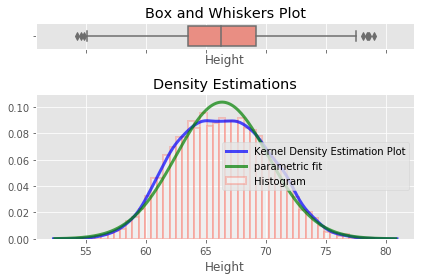

In [0]:
#### Example customized Seaborn displot+boxplot
import seaborn as sns
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

data = pd.read_csv('weight-height.csv')

# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (6,4) )

sns.distplot(data.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                   `               'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'salmon')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .08))
plt.ylim(0,0.11)
plt.legend()
plt.tight_layout()

### plot_host_scat_sns

In [0]:
#Import matplot.pyplot, and matplotlib.ticker 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Plots histogram and scatter (vs price) side by side
def plot_hist_scat_sns(df, target='price'):
    
    
    ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##
   # Axis Label fonts
    fontTitle = {'fontsize': 16,
               'fontweight': 'bold',
                'fontfamily':'serif'}

    fontAxis = {'fontsize': 14,
               'fontweight': 'bold',
                'fontfamily':'serif'}

    fontTicks = {'fontsize': 12,
               'fontweight':'bold', 
                'fontfamily':'serif'}

    # Formatting dollar sign labels
    fmtPrice = '${x:,.0f}'
    tickPrice = mtick.StrMethodFormatter(fmtPrice)
    

    ## ----------- PLOTTING ----------- ##
    
    ## Loop through dataframe to plot
    for column in df.describe():
    
        # Create figure with subplots for current column
        # Note: in order to use identical syntax for large # of subplots (ax[i,j]), 
        # declare an extra row of subplots to be removed later
        fig, ax = plt.subplots(figsize=(12,10), ncols=2, nrows=2)

        ## ----- SUBPLOT 1 -----##
        i,j = 0,0
        ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)
        
        # Define graphing keyword dictionaries for distplot (Subplot 1)
        hist_kws = {"linewidth": 1, "alpha": 1, "color": 'blue','edgecolor':'w'}
        kde_kws = {"color": "white", "linewidth": 1, "label": "KDE"}
        
        # Plot distplot on ax[i,j] using hist_kws and kde_kws
        sns.distplot(df[column], norm_hist=True, kde=True,
                     hist_kws = hist_kws, kde_kws = kde_kws,
                     label=column+' histogram', ax=ax[i,j])
 

        # Set x axis label
        ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)
    
        # Get x-ticks, rotate labels, and return
        xticklab1 = ax[i,j].get_xticklabels(which = 'both')
        ax[i,j].set_xticklabels(labels=xticklab1, fontdict=fontTicks, rotation=45)
        ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

        
        # Set y-label 
        ax[i,j].set_ylabel('Density',fontdict=fontAxis)
        yticklab1=ax[i,j].get_yticklabels(which='both')
        ax[i,j].set_yticklabels(labels=yticklab1,fontdict=fontTicks)
        ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())
        
        
        # Set y-grid
        ax[i, j].set_axisbelow(True)
        ax[i, j].grid(axis='y',ls='--')

        
        ## ----- SUBPLOT 2----- ##
        i,j = 0,1
        ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

        # Define the ketword dictionaries for scatter plot and regression line (subplot 2)
        line_kws={"color":"white","alpha":0.5,"lw":4,"ls":":"}
        scatter_kws={'s': 2, 'alpha': 0.5,'marker':'.','color':'blue'}

        # Plot regplot on ax[i,j] using line_kws and scatter_kws
        sns.regplot(df[column], df[target], 
                    line_kws = line_kws,
                    scatter_kws = scatter_kws,
                    ax=ax[i,j])
        
        # Set x-axis label
        ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

         # Get x ticks, rotate labels, and return
        xticklab2=ax[i,j].get_xticklabels(which='both')
        ax[i,j].set_xticklabels(labels=xticklab2,fontdict=fontTicks, rotation=45)
        ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

        # Set y-axis label
        ax[i,j].set_ylabel('Price',fontdict=fontAxis)
        
        # Get, set, and format y-axis Price labels
        yticklab = ax[i,j].get_yticklabels()
        ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
        ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

        # Set y-grid
        ax[i, j].set_axisbelow(True)
        ax[i, j].grid(axis='y',ls='--')       
        
        ## ---------- Final layout adjustments ----------- ##
        # Deleted unused subplots 
        fig.delaxes(ax[1,1])
        fig.delaxes(ax[1,0])

        # Optimizing spatial layout
        fig.tight_layout()
    return 

# FLATIRON BOOTCAMP NOTES

## Getting started 

### Git Bash Terminal
* Launch Git Bash on Windows
    * Can right click inside a folder in Windows and select GitBash to start in current folder
```python      
      source activate learn-env # Make sure to use learn-env 
```
* [!] New Conda Warning / Updating Your Learn-Env Packages
   * If you see a message that states “WARNING: A newer version of conda exists” run :
```python
    conda update -n base conda # and then try again to create the environment using:
    conda env create -f environment.yml.
```
#### [!] if Jupyter Notebook doesn’t have the Learn-env kernel as an option:
```bash
 python -m ipykernel install --user --name=learn-env
```
#### General terminal commands

cd d: # change to d drive before calling folders
cd('D:/Users/My Name/My Flatiron Files') # in quote
cd .. # move up one level 

ls # list folders in current directory
pwd # print working directory
mkdir #new folder		

Ctrl + C # to interrupt kernel
Ctrl + Shift + Insert # to paste

Up Arrow / Down Arrow # cycles through previous commands 
        
#### Cloning Git, Loading Jupyter Notebook
```bash
source activate learn-env #gitbash
git clone <URL> # control+shift+insert to paste
cd(''D:/Users/My Name/My Flatiron Files'/new-cloned-git-learn-lesson/) 

jupyter notebook #launches notebook in current dir         
```
- Click on index.ipnb # Lessons are containeed in index.ipnb*
- Click Kernel > Change Kernel > learn-env
    
#### Pushing notebooks back to git
git add .
git commit -m "Comments go here"
git push       

### Jupyter Notebook Hotkeys & Mouse Tricks

* Shift + Tab # inside method/function () for help

* % matplotlib inline #for graphs in notebook

* ctrl+/  # comment / uncomment selection
* shift + enter  #run cell, select below.
* ctrl + enter # run cell.
* alt + enter #run cell, insert below.
  
* A # insert cell above.
* B # insert cell below.

* C # copy cell.
* V # paste cell.

* X # delete selected cell.
* Y # change cell to code
* M # change cell to markdown

* Ctrl +Click # create multiple cursors at once (edit simultaneously)

#### [!] if Jupyter Notebook doesn't have the Learn-env kernel as an option:
```python
         *python -m ipykernel install --user --name=learn-env*
```

## BASIC PYTHON FUNCTIONS/METHODS/INDEXING
```python
	len(), type()
    var+=1 # can add / sub 
	set(list) # returns unique values
	list(range(0,len(variable))) # create numerical index for variable length
	round(result,num_decimals) # Display only 2 decimal places
```
### List Indexing:
```python
		list=['str','str']
		data[0:5] # select data elements 1-4
		data[5:] # select 5 to the end
		data[0:end:2] #Select every other ek
		data[-1] #last element
```
### List Methods 
```python
    list.append()
    list.pop()
    list.extend() #joins 2 list
    list.insert()
    list.remove()
    list.count()
    
    list.reverse()
    list.sort() # doesn't return a value 
    s=sorted(list,key_func,reverse=True)
    
    filtered_list = filter(func_that_filters, orignal_long_list )
```

### String methods
```python

    str.upper()
	str.lower()
	str.capitalize() 
	str.title() 

	str.strip()
	str.endswith(txt)
	str.startswith(txt)
	str.split('_')
	str=f'This string references my {variable} named variable.'
    
     # Print vars inside of strings with f-string formatting
    print(f'My str will have {variable_names} inserted into it.')
```

### Dictionary Indexing:
```python
    new_dict=dict()
    ex_dict  = {'key1' : value1 , 'key2' : value2}
    
	ex_dict['key1'] [element_index]# returns element from value1
    
    key_to_add='Name'
    ex_dict[key_to_add]= 2 
    
    ex_dict.keys() # returns all keys
	ex_dict.values() # returns all values
	ex_dict.items() # returns all items

	ex_dict.get(var, value_if_DNE) #DNE=does not exist 
    
```
#### Ex: Updating a dictionary value (if it exists) by  looping through an iterable
```python
		words=txt.split() # A long list of strings
		word_counts={} # Empty dictionary
    
        #Loop through words list 
		for word in words:
			word_counts[word] = word_counts.get(word, 0_ ) #dict.get(key, default_value)
```

### Flow control (conditionals and loops)
#### If, elif, else
```python
if <condition>:
		code_to_run
	elif other_condition:
		other_code_to_run
	else:
		otherwise_run_code
# Ends via indentation
```    
#### Conditional statement to chceck of variable exists inside of the list/iterable var 

##### try, except 
```python
try:
    df = pd.read_csv('Data/Yelp_Reviews_Corrupt.csv')
except Exception as e:
    print(e)
```
#### For loops 
```python
	for element in iterable:
		'run this code'

	*for key, value in exampl_dictionary.items()*
		'run this code'
```
#### While loops

### Defining functions
```python
	def function_name(parameters_in=default_value:  #can do (), but variables must already exist
		str='run this code'
		return value_to_send_back
```

### Lambda functions
```python
    df['column'] = df.column_to_operate_on.map(lambda x:  'N' in x)
```
### List Comprehensions
...

## GRAPHING WITH MATPLOTLIB
```python
    import matplotlib.pyplot as plt
	%matplotlib inline # onlu jupyter notebooks
    
	plt.figure(figsize=(x,y))

	data_to_graph.plot(kind='barh') # default is line
```    
   Can call plotting *functions:*  
```python
    plt.scatter(x,y)
    plt.hist(x,bins=num)

	plt.title('Top 5 Lego Themes', fontsize=16) #fontsize is optional
	plt.xlabel('Number of Lego Sets') #you could also pass in fontsize if you wanted here
	plt.ylabel('Theme') #you could also rotate text if you wanted

	plt.legend()
	plt.show()
```

#### Matplotlib from lesson - two subplots:
```python
	# Define a new figure with matplotlib's .plot() function. Set the size of figure space
	new_figure = plt.figure(figsize=(10,4))
	# Add a subplot to the figure - a new axes
	ax = new_figure.add_subplot(121)
	# Add a second subplot to the figure - a new axes
	ax2 = new_figure.add_subplot(122)
	# Generate a line plot on first axes
	ax.plot([1, 4, 6, 8], [10, 15, 27, 32], color='lightblue', linewidth=3, linestyle = '-.')
	# Draw a scatter plot on 2nd axes
	ax2.scatter([0.5, 2.2, 4.2, 6.5], [21, 19, 9, 26], color='red', marker='o')
	# Set the limits of x and y for first axes
	ax.set_xlim(0, 9), ax.set_ylim(5,35)
	# Set the limits of x and y for 2nd axes
	ax2.set_xlim(0, 9), ax2.set_ylim(5,35)
	# Show the plot
	plt.show()

```
#### Matplotlib from lesson - inset subplot
```python
	# Generate sample data 
	x = np.linspace(0, 5, 11)
	y = x ** 3

	# Creates blank canvas
	figure = plt.figure()

	# Add new axes to the figure with absolute positions
	ax1 = figure.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
	ax2 = figure.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

	# Larger Figure Axes 1
	ax1.plot(x, y, color = 'blue', linestyle = '-.')
	ax1.set_xlabel('X_label on axes1')
	ax1.set_ylabel('Y_label on axes1')
	ax1.set_title('Axes 1 Title')

	# Insert Figure Axes 2
	ax2.plot(y, x, color = 'green', linestyle = '--')
	ax2.set_xlabel('X_label on axes2')
	ax2.set_ylabel('Y_label on axes2')
	ax2.set_title('Axes 2 Title')

	plt.show()

```


### Stem & leaf plots

The last major digit is convertd to category on x-axis, the ones-digits are then
plotted as Y-values (cannot see multiple instances of same value)

![](media/2a56e9788cee9b0d83f8b81a87a8ccb7.emf)
```python
Import matplotlib.pyplot as plt  
%matplotlib inline  
plt.style.use(‘ggplot’)  
\# Create a stem and leaf plot including the above styling
plt.figure(figsize=(12,8))
\# markerline, stemlines, baseline =
plt.stem(stems, leafs, '-.', 'o' )
plt.title('Stem and Leaf Plot for Student Marks', fontsize = 30 )
plt.ylabel('Leafs', fontsize = 20)
plt.xlabel('Stems', fontsize = 20)
plt.show()
```


### My Histograms from PDF lab

```python
fig2=plt.figure()
male_df['Height'].plot(kind='hist',color='blue',edgecolor='pink',label='Male',density=True,alpha=0.7)

female_df['Height'].plot(kind='hist',color='pink',edgecolor='blue',label='Female',density=True,alpha=0.7)

plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.legend()

\# You code here
x_male,y_male=density(male_df['Height'])
plt.plot(x_male,y_male,':',color='cyan',linewidth=3)
x_female,y_female=density(female_df['Height'])
plt.plot(x_female,y_female,'--',color='magenta',linewidth=3)
plt.show()
```

## PANDAS AND DATAFRAMES
```python
	import pandas as pd
	dataframe= pd.read_csv('filename.csv',header=1, encoding='latin-1',usecols=[1,2,3])
	df=pd.read_excel('filename.xlsx',sheet_name='sheet name')
	
	workbook = pd.ExcelFile('filename.xlsx')
	workbook.sheet_names
	df = workbook.parse(sheet_name=1)

	df.to_csv('file.csv',index=False) #create csv file
	df.to_excel() #excel 
	df.to_dict()
```


### Pandas methods and functions
```python
	df.head() # display first few rows ; can do df.column.head()
	df.tail()
	df.info() #
	df.shape() # rows and columns-
	df.describe() # quick statistics for all of dataframe
	df.dtypes()
	df.index()
	df.columns()
	df.drop() 
	df.set_index('column')
	df.reset_index()
```
#### Dataframe Indexing  
```python
# For series/column
    df['col_ name'] # OR:
    df.col_Name
# For rows ..?
    # []TBD!
# Index data by position .iloc[ ]
	df.iloc[row_idx_start : row_idx_exclusive, col_idx_start: col_idx_end] # slice row row_idx
# Index data using .loc[]: 
    # Index based upon their labels (row index and column name)
        df.loc[row1:rowEnd,'column_name' ]     
    # Index based upon conditional (boolean) statements
        df.loc[df['col_to_test'] < condition1 ]
        singe_col_filtered = df.loc[df['col_to_test'] < condition1, ['column_name']]
    # Index based upon two conditionals
        df.loc[(df["col_to_test1"] == condition1) & (df["col_to_test2"]== condition2)]
    # Changing values via .loc indexing
        df.loc[df["color_intensity"]>10, "color_intensity"] = 10
    # Changing values if contain string
        df.loc[df["Home Team Name"].str.contains('Korea'), "Home Team Name" ]        
```

### Useful pandas series methods:
```python
    df.col_name.value_counts() #[0:5]
    df.col_name.astype()
    series.mean() #Changing notation here: series refers to df.col_name (which is a series)!
    series.median()
    series.min()
    series.max()
    series.std()
    series.unique()
    series.nunique()
    series.sample()
    series.sort_values()
    series.hist()
```

#### Examples: using pandas 
##### Ex from lesson: conditional indexing
```python
    # Index based upon an  3 variables, var1/cond1 & (var2/cond2 | var3/cond3)} # / just means var+ condition 
	USA_home_and_away = df[(df.Year==2014)  & ((df['Home Team Name'] == 'USA') | (df['Away Team Name']=='USA'))
```
##### Ex from lesson: operating on dataframes (change names, cols)
```python                           
    # Drop a column of the df
    df = df.drop('C/A', axis=1) #drop the COLUMN(axis=1) 'C/A'

    # Rename columns
    df = df.rename(columns={'DATE' : 'date'})
		
    # Operate on columns names
    new_cols = [col.lower() for col in df.columns]                       
    df.columns = [my_function(col) for col in df.columns] 
```
##### Ex from lessons: using datetime type 
```python
    df.DATE = pd.to_datetime(df.DATE, format='%m/%d/%Y') # convert dates to datetime type
    df.DATE.dt.day_name() #dt.day_name
    df['Dayofweek'] = df.DATE.dt.dayofweek 
```

#### Groupby 
```python 
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')
 # HMmm weird
df['Num_Lines'] = df.LINENAME.map(lambda x: len(x))
```
#### Dataframe statistics methods
 (.mean(), .std(), .count(), .sum(), .mean(), .median(), .std(), .var() and .quantile())

### Using Map/apply to operate on data frames
```python
df[‘column’].map(lambda x: len(x.split()).head()
#LAMBDA + MAP FUNCTIONS WITH CONDITIONALS
df['text'].map(
    lambda x: 'Good' if any([word in x.lower() for word in ['awesome', 'love', 'great']]) else 'Bad').head()
 ```
 #### Using .applymap()
```python
string_df=df.applymap(lambda x: str(x))
```



## HOW TO: cleaning a dataset and checking for missing values
```python
	print('   HEROES_DF INFORMATION:\n')
	print(heroes_df.info())
	print('\n')
	# print('heroes_df value counts (check for redundancy):')
	# print(heroes_df['name'].value_counts()[0:10])
	# print('\n\n')

	print(f'NaN values in data? \n {heroes_df.isna().any().any()}\n')

	# print('heroes_df names - Number of Redundant:'.upper())
	# print(f'Num unique names: {len(heroes_df.name.unique())}')
	# print(f'Num of repeated names: {len(heroes_df.name)-len(heroes_df.name.unique())}')
	# print('\n')

	print('heroes_df -  Missing Publisher values:'.upper())
	#print(f'Num unique: {len(heroes_df.Publisher.unique())}')
	print(f'Num missing: {heroes_df.Publisher.isna().sum()} out of {len(heroes_df.Publisher)}, ({round((heroes_df.Publisher.isna().sum() /len(heroes_df.Publisher) * 100),2) }%)')
	# print(f'{heroes_df.Publisher.isna().sum()/len(heroes_df.Publisher)*100}%')
	print('\n')

	print('heroes_df - Missing Weight values:'.upper())
	# print(f'Num missing: {heroes_df.Weight.isna().sum()}')
	print(f'Num missing: {heroes_df.Weight.isna().sum()} out of {len(heroes_df.Weight)}, ({round((heroes_df.Weight.isna().sum() /len(heroes_df.Weight) * 100),2) }%)')
	print('\n')
```


## SQL (sect 05)

### Using sqlite3 with SQL databases
```python
import sqlite3
connection = sqlite3.connect('pet_database.db') # Creates pet_database, but empty until create a table    
cursor = connection.cursor()

# use the corsor to execute sql commands
cursor.execute(''' 
CREATE TABLE cats (
    id INTEGER PRIMARY KEY,
    name TEXT,
    age INTEGER,
    breed TEXT
)
''')

# Insert into table
cursor.execute('''INSERT INTO cats (name, age, breed) VALUES ('Maru', 3, 'Scottish Fold');''')
# Select from table
cursor.execute('''SELECT name FROM cats;''').fetchall()

# Select only distinct entries
cursor.execute('''SELECT DISTINCT name FROM cats;''').fetchall()
# Selecting by conditionals using WHERE
cursor.execute('''SELECT * FROM [table name] WHERE [column name] = [some value];''').fetchall()

# Altering a table 
cursor.execute('''ALTER TABLE cats ADD COLUMN notes text;''')
# Updating data
cursor.execute('''UPDATE [table name] SET [column name] = [new value] WHERE [column name] = [value];''')
# Deleting data
cursor.execute('''DELETE FROM [table name] WHERE [column name] = [value];''')
```

#### Some Notes on Displaying Query Outputs
```python 
    import pandas as pd
    #Demonstrating running a query and previewing results as pandas DataFrame
    results = cursor.execute("""select * from planets;""").fetchall()  
    df = pd.DataFrame(results)
    df. columns = [i[0] for i in cursor.description]
    df.head()

    # CAN MAKE A FUNCTION TO SIMPLIFY
    def sql_select_to_df(SQL_COMMAND, cur=cursor):
        results = cur.execute(SQL_COMMAND).fetchall()
        df = pd.DataFrame(results)
        df.columns = [i[0] for i in cur.description]
        return df
    
    # Call function to select data
    df = sql_select_to_df("""select * from planets;""")
    df.head()
    
    # Select with function + conditional
    df=sql_select_to_df("""SELECT * FROM planets WHERE mass > 1;""")
    df.head()
    
    # Select with AND 
    df=sql_select_to_df("""SELECT * FROM planets WHERE (num_of_moons>1 AND mass < 1);""")
    df.head()```

#### Filtering and Ordering
```python
# ORDER BY
cursor.execute('''SELECT column_name FROM table_name ORDER BY column_name ASC|DESC;''').fetchall()
# LIMIT
cursor.execute('''SELECT * FROM cats ORDER BY age DESC LIMIT 3;''').fetchall() #Fetch top 3
cursor.execute('''SELECT * FROM cats ORDER BY age DESC;''').fetchone() #returns the first 
# BETWEEN
cursor.execute('''SELECT column_name(s) FROM table_name WHERE column_name BETWEEN value1 AND value2;''').fetchall()
# NULL - placeholder
cursor.execute('''INSERT INTO cats (name, age, breed) VALUES (NULL, NULL, "Tabby");''')
#SELECT BY NULL
SELECT * FROM cats WHERE name IS NULL;
# COUNT
SELECT COUNT([column name]) FROM [table name] WHERE [column name] = [value];
# GROUPBY
SELECT breed, COUNT(breed) FROM cats GROUP BY breed;
SELECT breed, owner_id, COUNT(breed) FROM cats GROUP BY breed, owner_id;

```

## Object-Oriented Programming (Sect 06-07)


### Defining classes 

```python
# Must define class NameConventionCase
class MyNewClass: 
    pass # If no attributes, must pass
# Instantiate an MyNewClass object
new_instance = MyNewClass() 

```
### Class Attributes & Methods 
* Instance methods are like attributes, but are *callable.*
* When calling a object **.method()**, the object *implicitly* called
    * Must use `self` to tell methods to expect input variable 

```python 
# Defining an instance method:
class Dog():
    def bark(self):
        return "Ruh-roh!"
    def needs_a_walk(self):
        self.gotta_go = False 
        return 'Phew that was close!'
    def whose_a_good_dog(self, name):
        return f'Whos a good dog???"\n {name.title()} is!'  

# Calling an instance method
new_rex = Dog()
new_rex.bark() # Ruh-roh!
new_rex.whose_a_good_dog('Fido')

```

###  Instance Variables & Setters and Getters

```python 
# _instance_ variables are protected from unwanted external edits
# They have class.methods() defined to set and get the values.
class BankAccount():
    
    def set_balance(self, amount):
        self._balance += amount    
    def get_balance(self):
        return self._balance
        
    def make_withdrawal(self, amount_requested):
        if (self.check_min_bal(amount_requested)):
            return self.check_min_bal(amount_requested)
        else: 
            self.set_balance(-amount_requested)
            return print(f'$ {amount_requested}')

        # ---- Note: some code cut -----
[BOOKMARK TO RETURN TO LATER]                
## Using Properties with Setters & Getters

# ----------- HERE is where we are using the property() function ----------------------------------- #
    balance = property(get_balance, set_balance)
```


```python        
# Initializing Instance Objects Using _init_ 
class Business():
    def __init__(name=None, biz_type=None, city=None, customers = {}):
        business.name = name
        business.biz_type = biz_type
        business.city = city
        business.customers = customers

    # Normal function to instantiate a BankAccount
    def make_account():
        new_account = BankAccount()
        new_account._balance = 0
        new_account._minimum_balance = 250
        new_account._max_withdrawal = 150 
        return new_account
```
```python
class Customer():
    def __init__(self, name=None, orders=[], location=None):
        self.name=name
        self.orders = orders
        self.location = location
    def add_order(item_name, item_cost, quantity):
        self.orders.append({'item_name': item_name, 'item_cost':item_cost, 'quantity':quantity})
```

```python

# Simple / lazy way
class Person:
    def set_name(self, name):
        self.name = name
    def set_job(self, job):
        self.job = job

```

## Using NumPy & Arrays (section 08)


### Numpy & element-wise math operations

```python
# Intitialize a np array
import numpy as np
x=np.array([1,10,20,30]) 
print(x)

#np  Array Math Operations
print('x*3 =', x * 3 ) # Array .* (element-wise function)
print('[1,2,3] * 3=' ,[1,2,3] * 3)
print('x + 2=',x + 2) #Adds two to each element
# But can't do element-wise addition
[1,2,3] + 2 # Returns an error; different data types
```

### Scalar Math
Here arr = np array
```python
np.add(arr,1) # Add 1 to each array element
np.subtract(arr,2) # Subtract 2 from each array element
np.multiply(arr,3) # Multiply each array element by 3
np.divide(arr,4) # Divide each array element by 4 (returns np.nan for division by zero)
np.power(arr,5) # Raise each array element to the 5th power  
```
### Vector Math
Here arr1, arr2 are both np arrays
```python
np.array_equal(arr1,arr2) # Returns True if the arrays have the same elements and shape

np.add(arr1,arr2) # Elementwise add arr2 to arr1
np.subtract(arr1,arr2) # Elementwise subtract arr2 from arr1
np.multiply(arr1,arr2) # Elementwise multiply arr1 by arr2
np.divide(arr1,arr2) # Elementwise divide arr1 by arr2

np.power(arr1,arr2) # Elementwise raise arr1 raised to the power of arr2
np.sqrt(arr) # Square root of each element in the array
np.log(arr) # Natural log of each element in the array

np.abs(arr) # Absolute value of each element in the array
np.ceil(arr) # Rounds up to the nearest int
np.floor(arr) # Rounds down to the nearest int
np.round(arr) # Rounds to the nearest int

np.sin(arr) # Sine of each element in the array
```
### Appending / adding elements
```python
[1,2,3] + [4,5,6] #Adding raw lists is just appending
np.array([1,2,3]) + np.array([4,5,6]) #Adds elements

#Same as above with built in method
x = np.array([1,2,3])
y = np.array([4,5,6])
np.add(x,y)
```

### Multi-dimensional Arrays with Numpy


* numpy displays arrays in more user friendly way ( rows above rows)
    * <img style=float src="attachment:ScreenClip.png" align="left"/>
  

* np.shape returns length of each dimensions (row, col, __) 

```python
    y = np.array([[1,2,3],[4,5,6]])
    print(y.shape) # (2,3)
```

### Numpy Functions for Creating Arrays
```python
# np.zeroes(shape) and np.ones(shape)
    np.zeros(5) # #one dimensional; 5 elements, all 0
    np.zeros([2,2]) #two dimensional; 2x2 matrix
    np.zeros([3,4,5]) #3 dimensional; 3 4x5 matrices
    
    np.ones(shape) # Returns 1's

# np.full(shape,fill) 
    np.full(shape, fill) # fill array with arbitrary values
    np.full(5, 3) #Create a 1d array with 5 elements, all of which are 3
    np.full(5, range(5)) #Create  array with 5 elements (0-4) (ONLY WORKS WITH 1-2 DIMENSIONS)
    
```

### NP Array Indexing / Subsetting
```python
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
print(x.shape) #(4,3)
#Result displays as:
np.array([[1,2,3], 
          [4,5,6], 
          [7,8,9], 
          [10,11,12]])

# Slice rows with 1 index:
x[0] # array([1,2,3])

#Slice rows, columns  
# x[slice_dim1, slice_dim2]
x[:,0] #All rows, column 0

# If array has more than 2 dimensions:   
print("NOTE: [!] If have multi-dim array (3+ dim), can't use row,col indexing!!")

#To slice along a second dimension with lists - list comprehension
[i[0] for i in x] #returns first element from each row 

#Doing this in multiple dimensions with lists
[i[1:3] for i in x[2:4]] #returns rows (second-third), columns (third:fourth) [[8,9],[11,12]]
```

#### Slicing 3D arrays
```python 
#With an array
x = np.array([
              [[1,2,3], [4,5,6]],
              [[7,8,9], [10,11,12]]
             ])
x
    #returns: 
    array([[[ 1,  2,  3],
            [ 4,  5,  6]],

           [[ 7,  8,  9],
            [10, 11, 12]]])

# Array is 3-D
x.shape #(2,2,3)
# 3-D indexing
x[:,:,-1]
#returns last element of ebery row, col:
array([[ 3,  6],
   [ 9, 12]])
```

### Get unique vanlues and counts from a np array
values, counts = np.unique(np_it, return_counts=True)

## STATISTICS AND PROBABILITY (Section 08)

### Set definions
#### set :  
- a *well-defined colletion of objects*.
- _Math notation:_
    - define a set by $S$. 
    - If an element $x$ belongs to a set $S$:
        - $x \in S$.
    - If $x$ does not belong to a set $S$:
        - $x\notin S$.
        
#### subset: 
- set $T$ is a subset of set $S$ if *every element* in set $T$ is also in set $S$. 
    - Notation for a subset is $T \subset S$.   
        - $T$ and $S$ can be the SAME
    - If $T$ != $S$, but $T \subset S$, called a '_proper subset_'
        - Can use notation:  $T \subsetneq S$ and $T \subseteq S$ 

#### Universal set:
- The collection of all possible outcomes in a certain context or universe.
    -  often denoted by $\Omega$.
    - Example: all possible outcomes of a 6-sided die:
        - $\Omega = \{1,2,3,4,5,6\}$
    - Can have infinite # of elements (e.g. the set of all real numbers!)

### Set operations:
- Data used in examples:

Imagine you have two sets of numbers, say the first 4 multiples of 3 in set $S$:

$ S = \{3,6,9,12\}$

 and the first 4 multiples of 2 in set $T$:
 
$ T = \{2,4,6,8\} $.

#### Union (combining elements)
- the union of $S$ and $T$ is denoted as $S \cup T$

#### Intersection
- contains all elements of $S$ that also belong to $T$. 
    - denoted as $S \cap T$.
    
#### Relative complement / difference
-  the relative complement of S contains all the elements of T that are NOT in S.
    - relative complement of S (or $ T\backslash S $) is $\{2,4,8\}$.
    - relative complement  of T (or $ S\backslash T $) is $\{3,9,12\}$.

#### Absolute complement
- The absolute complement of $S$, with respect to the Universal set $\Omega$, is the collection of the objects in $\Omega$ that don't belong to $S$.
    -  absolute complement of $S$ is denoted as $S'$ or $S^c$.

- Example: Let's define $\Omega$ (box around the two venn diagrams) = multiples of both 2 and 3 until 20.

    - Elements of $\Omega$ are $\{2,3,4,6,8,9,10,12,14,15,16,18,20\}$. 

    - The absolute complement of $S$ (so $S'$ or $S^c$) is then given by $\{2,4,8,10,14,15,16,18,20\}$.
    
#### Inclusion Exclusion principle
- When combining  2 sets, the method for obtaining the union of two finite sets is given by:

    - $\mid S \cup T \mid = \mid S \mid + \mid T \mid - \mid S \cap T \mid $
    
        - Horizontal lines denote the *cardinality* of a set, which is the number of elements, considering a finite set. 
        
        
- *The formula expresses the fact that the sum of the sizes of the two sets may be too large since some elements may be counted twice. For the double-counted elements, one is substracted again.*

### Empty 
 - An **empty** set has no elements
 - denoted by $\emptyset$ or simply $\{\}$


### Into to probability 
#### Sample Space & Event Space
##### Sample space:
$$S = \{ 1,2,3,4,5,6\}$$ 
being the possible outcomes when throwing a dice.

##### Event space:
-   The **event space** is a subset of the sample space, $$E \subseteq S$$
-   Example:
    -   Throwing an odd number would lead to an event space $$E = \{ 1,3,5\}$$.

### Law of relative frequency
- Limit of large infinite outcomes produce fixed numbers .
$$P(E) = \lim_{n\to\infty}\frac{S(n)}{n}$$
    - Probability of Event E having Successful(S) outcomes for $n$ trials
    
#### Probability axioms

1.  Positivity : Prob is always 0 \<= P(E) \<=1

2.  Probability of a certain event: P(S)=1

3.  Additivity Union of 2 exclusive sets = sum prob of individual events
    happening <br>
If $A\cap B = \emptyset $, then $P(A\cup B) = P(A) + P(B)$

### Addition law of probability 

-   Prob of union of A and B is individual P minus intersection
$$P(A\cup B) = P(A) + P(B) - P(A \cap B)$$


### HOW TO: test probability of an event: 

1.  What is the prob of E happening at least once?

    1.  Get Boolean result for E:  
        Set_E =sample_population == E

    2.  Verify condition:  
        true_E=np.any(set_E, axis = 1)

    3.  Prob_E=np.sum(true_E)/len(sample_population)

Permutations and Factorials:
----------------------------

### Permutations of a subset

How many ways can we select k elements out of a pool of n objects?
- $k$-permutation of $n$:

$n*(n-1)*...*(n-k+1)$ or in other words, $P_{k}^{n}= \dfrac{n!}{(n-k)!}$

### Permutations with replacement 

\# of possible options doesn’t change, so n is raised to the power of j, the number of draws from the pop<br>
$n^j$

### Permutations with repetition ...?

The \# of permutations of *n* objects with identical objects of type 1<br>
$(n_1^{j_1}* n_2^{j_2})$
<img src="https://www.dropbox.com/s/5qrwxgv541u6kj5/00ff12464dd108477fd6a5dbeac9868d.png?raw=1">

### Combinations
- How many ways can we create a subset $k$ out of $n$ objects? 
    - Unordered
$$\displaystyle\binom{n}{k} = \dfrac{P_{k}^{n}}{k!}=\dfrac{ \dfrac{n!}{(n-k)!}}{k!} = \dfrac{n!}{(n-k)!k!}$$




### Distributions: Discrete vs Continuous 
#### Discrete Distributions
-   Bernoulli = Repeated trials of binary outcome event. ( x successes in n trials)(flipping a coin)
-   Geometric = Repeated trials, but examines the probability that the first success will occur on trial n.
-   Poisson = The probability of n events in a given time period when overall rate of occurrence is constant (i.e. receiving mail)
-   Uniform = all outcomes equally likely


## Distributions (sect 19)
- **Can be discrete or Continuous Probability Functions**
<img src="https://www.dropbox.com/s/7qooiy76s3jvcr1/pmf_pdf.png?raw=1" width=400>
<img src="https://www.dropbox.com/s/ovrzewnefk2qc97/exp-var.png?raw=1" width=400>

- **Common Distributions:**
<img src="https://www.dropbox.com/s/lu8iffegqjnp4kq/dists.png?raw=1" width=600>

### Discrete Distributions
#### Bernoulli Distribution / Binomial Distribution
- Probability of $x$ successes in $n$ trials for Bernoulli/binomial variable (binary outcome)
    - Described by only one parameter $p$
- For binomial *trial*: $Y = Bernoulli(p)$ and $p=P(Y=1)=0.8$
- For binomial *distribution*, events are independent. 
$$ P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 

#### Geometric Distribution
- Geometric = Repeated trials, but examines the probability that the first success will occur on trial n.

#### Poisson
- Represents the probability of $n$ events in a given time period when the rate of occurrence is constant

#### Uniform
- All outcomes are equally likely. 
- BOTH continuous AND discrete

### Continuous Distributions
#### Normal / Gaussian Distribution
- Bell shape curve very common in natural data
- Symmetrical, mean = median = mode 
- AUC == 1

###### Normal Density Function
- Density of normal distribution for given value of x
- Can describe from its center and spread
$$y = \frac{1}{\sigma \sqrt{2}{2\pi}}e^{\frac{{(x -\mu)}{^2}}{2 \sigma ^{2}}}$$
- $\mu$ = mean
- $\sigma$ = standard deviation
- $\pi \approx 3.14159$
- $e \approx 2.71828$

#### Standardized Normal Distribution
$$z = \frac{x-\mu}{\sigma}$$

###  Probability Mass Function (PMF) / probability distribution
- Converts frequency of events to probability of a particular outcome of a **discrete** function, by normalizing so that the sum of all outcomes == 1.
- Can test what is the probability that $x$ takes on a particular value $k$
    - $P(X=k)$

-   Gives probability for discrete random variables, if we have x outcomes, we want to know what is the probability of getting k (our value of interest) from x
- Maps a value from its probability 

#### How to convert frequency to probability  for PMF
```python
import numpy as np  
import collections  
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter = collections.Counter(x)  
\# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(round(val/len(x), 2))
    print(counter.keys(), pmf)  
  
# Proof that is normalized to overall prob of 1 (needed for PMF)  
np.array(pmf).sum()
# Visualizing PMF – similar to histogram, but normalized to P=1*  
import matplotlib.pyplot as plt  
plt.style.use(‘ggplot’)  
plt.stem(counter.keys(), pmf)  
```
<img src="https://www.dropbox.com/s/ghbwhp17z4ulyvc/e51d10e06e9b70069c792d9fa8172e5e.png?raw=1" width=300>

### CUMULATIVE DENSITY FUNCTION
- With large sample space $S$ (# of possible outcomes) for values of $X$, too hard to visualize with pmf
- maps a value from its percentile rank for **discrete** functions
- calculated as the $$F(x) = P(X \leq x)$$

### PROBABILITY DENSITY FUNCTION
- Essentially equivalent to the pmf, but for **continuous** functions
- Line represents regions where observations most likely to occur (the density)
<img src="https://www.dropbox.com/s/y8i8azec6ncpuum/pdf1.png?raw=1" width=300>

#### Calculate area under the curve around the value of interest
$$F(X) = P(a \leq x \leq b) = \int_a^b f(x) dx \geq 0$$
<img src="https://www.dropbox.com/s/5q9gnarklq769zt/pdf2.jpg?raw=1">



### Kernel Density Estimation 
- Non-parametric estimation to plot a curve at every individual data point (kernels)
- Added together to plot smooth density estimation ( most common kernel is Gaussian)
- Below example histogram and kde are from the same data
<img src="https://www.dropbox.com/s/vrgcphxmry5148l/Comparison_of_1D_histogram_and_KDE.png?raw=1" width=400>

### Skewness
- Symmetrical distribution: skewness = 0
- **Fisher-Pearson Coefficient of skewess:**
$$∑ N_{i=1} \frac{{(Yi−\bar{Y})}^3}{N} / {\sigma^3}$$
- Rules of thumb
    - Symmetrical-ish: -0.5 to +.05
    - Moderate Skew:
        - Negative skew: -1 to -0.5
        - Positive skew: +0.5 to +1
    - Highly skewed:
        - Less than -1
        - Greater than +1
    

<img src="https://www.dropbox.com/s/mqr3kux0caa64nk/skew1.jpeg?raw=1">


### Kurtosis 
- Lengths of tails of distribution to describe extreme values (outliers)
- Univariate kurtosis:
$$\Sigma N_{i=1} \frac{{(Yi−\bar{Y})}^4}{N} / {\sigma^4}$$

- **Mesokurtic:**
    - Kurtosis similar to standard normal distribution
- **Leptokurtic (Kurtosis >3)**
    - Tails are fatter, peak is higher sharper
    - Data are heavy-tailed or many outliers
- **Platykurtic: (Kurtosis < 3)**
    - Shorter peak, tails are thinner than the normal distribution. 
    - Data are light-tailed or lack of outliers vs normal dist
<img src="https://www.dropbox.com/s/5ynsy7vkb196ilb/kurt2.jpg?raw=1" width=300>


## Statistical Distributions Recap (Sect 23)

### Uniform distribution
- Equal probability
- Probability function:<br>
$$\rho_{uniform}(x) = \dfrac{1}{b-a} \quad \mbox{ for } a \leq x < b $$
- Mean of uniform distribution:<br>
 $\dfrac{b+a}{2}$
- Variance of uniform distribution:<br>
$V = \dfrac{(b-a)^2}{12}$
- Standard Deviation:<br>
$\sigma = \dfrac{b - a}{2 \sqrt{3}}$.
#### Generate uniform in python

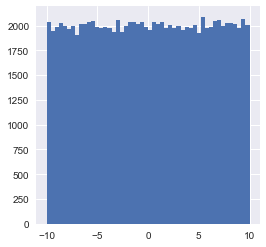

In [0]:
# Generate uniform data
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

values = np.random.uniform(-10.0, 10.0, 100000)

fig = plt.figure(figsize=(4,4))
plt.hist(values, 50) 
plt.show()

### Binomial Distribution
- Discrete version of normal distribution describing the probability distribution of a given # of successes 

$$\mu = n * p$$

where $n$ is the number of trials, and $p$ is the probability of success for a given trial. 

- The **_Standard Deviation for a Binomial Distribution_** is:

$$\sigma = \sqrt{n * p * (1 - p)}$$

- The formula for the **_Point Probability of the Binomial Distribution_** is:

$$ \Big(\frac{n!} {x! (n-x)!}\Big) p^x (1 - p)^{n - x}$$

 where $n$ is the number of trials, $p$ is the probability of success for a given trial, and $x$ is the number of successes.

- The formula for the **_Cumulative Probability of the Binomial Distribution_** is:

$$\sum_{i=0}^{x}  \Big(\frac{n!} {x! (n-x)!}\Big) p^x (1 - p)^{n - x}$$

where $n$ is the number of trials, $p$ is the probability of success for a given trial, and $x$ is the number of successes.

### Normal Distributions
- **_Probability Density of the Normal Distribution_** is:
$$f(x\ |\ \mu,\ \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}}e$$

- Where:
$x$ is the **_point_** we want to calculate the probability for
$\mu$ is the **_mean_** of the sample
$\pi$ is a mathematical constant, the irrational number $3.14159$
$\sigma^2$ is the **_variance_** (since $\sigma$ is the **_standard deviation_**)
$e$ is **_Euler's Constant_**, also known as the **_Base of the Natural Logarithm_**, $2.71828$

### Gaussian Distributions
- For Gaussian distribution, the probability function is calculated as:
$$
\rho_{Gaussian}(v) = \dfrac{1}{\sqrt{2 \pi \sigma}} e^{-\frac{v^{2}}{2\sigma^2}}
$$
- Mean of Gaussian distribution is $\mu$,
- Standard deviation is $\sigma$.
- Visualize Gaussian distributions with the probability density function ( scipy.stats.norm)

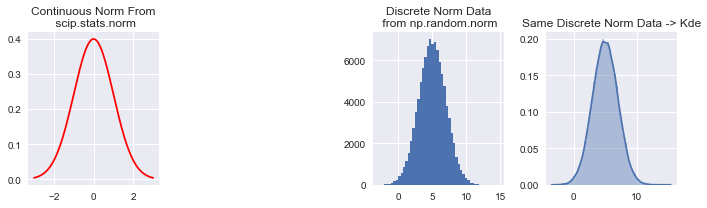

In [0]:
# Generating and Plotting Normal Distributions 
# Generate norm distribution
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generating and Plotting Normal Distributions 
fig, ax = plt.subplots(1,4, figsize=(10,3))

# Use scipy.stats.norm.pdf 
# to generate data for np array of x
n=0
ax[n].set_title(f'Continuous Norm From\n scip.stats.norm')
x = np.arange(-3, 3, 0.001) # Declare the range of x-values with np.arrange
# Use scipy.stats.norm to generate continuous kerndel density estimation for those x-values
ax[n].plot(x, norm.pdf(x), color='red')

# Generate nomral distribution in numpy
# using mean and std
n+=2
ax[n].set_title(f'Discrete Norm Data\n from np.random.norm')
values = np.random.normal(5.0, 2.0, 100000) #mean, std, size
ax[n].hist(values, 50)

# Showing the KDE for The Discrete norm distribution from numpy
n+=1
ax[n].set_title('Same Discrete Norm Data -> Kde')
sns.distplot(values, ax=ax[n])

# Finalize figure
plt.delaxes(ax[1])
fig.tight_layout()
plt.show()


### Exponential Distribution
- **For exponential distribution, the probability function is:**
$$
\rho_{exponential}(t) = \dfrac{ e^{-\frac{t}{\tau}} }{ \tau } \mbox{ for } t \geq 0
$$
- Mean is $\tau$
- Std is $\sigma = \tau$
- From scipy.stats import expon
    - expon.pdf to generate pdf <br>
  
#### Probability Density Function:
- Probability that our random variable $X$ will be a specific value $x$
$$PDF(x)=\lambda e^{-\lambda x}$$

- $\lambda$  = **decay parameter**(a.k.a. $m$)
    
$$\lambda = \frac{1}{\mu}$$

#### Cumulative Density Function:

$$CDF(x) = 1 - e^{-\lambda x}$$
- distribution is unique:
    - $\sigma = \mu$
  
#### Generate expoenential distribution

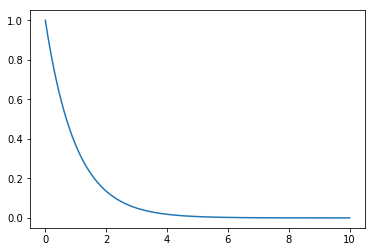

In [0]:
#### Generate Expon Distibution
from scipy.stats import expon
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x))

    
### Poisson Distribution
- Allows us to calculate the prob of a given event by examining the mean number of events that happen in a given time period. 
    - Described by parameters:
        - $\mu$:average # of successes over given time period 
        - $x$:our random variable - the number of successes we want to find the pmf for. 
- Probability mass function gives way to predict the odds of getting another value instead, on a given future day/interval
$$P(X) = \frac{\lambda^x e^{-\lambda}}{X!}$$
- $\lambda$ is average # of successful events
- $X\$ is  number of successes
- scipy.stats.poisson
#### Generate Poisson Disbtribution

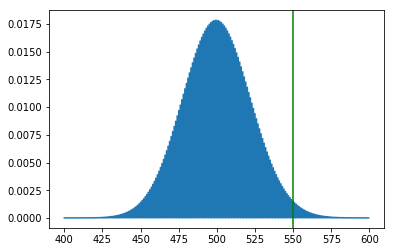

In [0]:
# Generate poisson distribution
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline
mu = 500
x = np.arange(400, 600, 0.5)
plt.plot(x, poisson.pmf(x, mu))
plt.axvline(550, color= 'g')

### Distribution Cheat Sheet

<img src="https://www.dropbox.com/s/k6qgj702dwn7vfr/distribution%20cheatsheet.jpg?raw=1" width=800>

### Negative binomial distribution
#### Negative binomial trials 
- Describes number of failures

#### Negative binomial distribution describes the ways negative binomial trials 
- Describes the of successes $k$ until observing a pre-determined # of failures $r$ for $x$ trials, where the probability for success for each independent trial is $p$.
- Calculating **Negative Binomial Probability** by multiplying binomial probability by the probabiltiy of failure on trial x:
    - $P^r∗(1−P)^{x−r}$
$$b(x, r, P) =\  _{x-1}C_{\ r-1} * P^{\ r} * (1-P)^{\ x-r}  $$

where C is the binomial distribution equation $$_{x-1}C_{\ r-1}$ = \frac{(x-1)!}{((n-1)-(r-1))!(r-1)!}$$.  

#### Characteristics of Negative Binomial Distribution:

- **_mean_**:

$$\mu = \frac{r}{p}$$

- **_variance_**:

$$\sigma^2 = \frac{r\ (1-p)}{p^{\ 2}}  $$

### Geometric Distribution
- Geometric = Repeated trials, but examines the probability that the first success will occur on trial n.
- Same constraints as negative binomal dist:
    -Multiple trials 
    - Outcome is binary
    - Prob success same across trials
    - Trials are independent 
- **Geometric Distribution Equation:**
$$P(X=x) = q^{(x\ -\ 1)}p$$

Where $$q = 1 - p$$

- $X$ denotes the _Discrete Random Variable_,
- $x$ the trial that we want to calculate the *Geometric Probability*
- $p$ the probability of failure for a given trial
- $q$ (1-p) is probability for success for given trial 

- **If p == q (equal prob), equation simplifies:
$$P(X=x) = q^x$$

### Distribution descriptions  in words
**_Binomial Distribution_**: "I flip a fair coin 5 times. What are the chances that I get heads 0 times? 1 time? 2 times? Etc..."

**_Negative Binomial Distribution_**: I flip a fair coin 5 times. What are the chances it takes me two flips to get heads twice? How about 3 flips to get heads twice? 4 Flips? Etc...

The **_Exponential Distribution_** describes the probability distribution of the amount of time it may take before an event occurs.  In a way, it solves the inverse of the problem solves by the Poisson Distribution.

The **_Poisson Distribution_** lets us ask how likely any given number of events are over a set interval of time.  

The **_Exponential Distribution_** lets us ask how likely the _length of an interval of time_ is before an event occurs exactly once. 

Another way to think of the Exponential Distribution is as the continuous analogue of the **_Geometric Distribution_**. 

## Kolmogorov-Smirnov Test

#### Noramlity assumption is important for many models-
- Examine with plots:
    - qqplots
    - boxplot
- Test with stats:
    - The Shapiro-Wilk test;
    - The Anderson-Darling test, and;
    - The Kolmogorov-Smirnov test.
    
#### KS test used observed/empirical CDFs for comparisons:**
- Uses CDFs to compare data to either:
    - an ideal normal distribtuion for a one-sample KS test
    - or another population for a two-sample KS test. 
- Similar to t-test but is sensitive to changes in the mean, variance, and shape of the data. 
    
<img src="https://www.dropbox.com/s/jle5rdzan84qmfj/d.gif?raw=1" width=400>

- **Empirical distribution function:**   
    - If X is a random variable with CDF $F(x)=P(X≤x)$ <br>
      and  $x1,…,xn$ are i.i.d. random variables sampled from X empirical distribution function.

$$\hat{F}(x) = \frac{\text{# of elements in sample} \leq x}{n} = \frac{1}{n} \Sigma_{i=1}^n I(x_i \leq x) \tag{1}$$


#### One-Sample KS Test
- Must provide completely specified theoretical distribution fucntion 
- Sensitive to mean, variance, shape. 
- Used to test normality assumption
$$
d	   =    	max(abs[F_0(X)-F_r(X)])
$$
where
- **d** is the maximum deviation Kolmogorov statistic 
- **F<sub>0</sub>(X)** = (No.of observations ≤ X)/(Total no.of observations) i.e. the non parametric empirical distribution
- **F<sub>r</sub>(X)** = The theoretical frequency distribution of X - parametric (e.g. based on mean value) 

#### Two-Sample KS test
- checks if two **independent** samples have been drawn from the same population, or, equivalently, from two identical populations (X = Y).
- compares two **sample** distributions (instead of theoretical)

$$d	   =    	max[abs[{F_{n1}(X)-F_{n2}(X)}]]$$
- $n_1$ = Observations from first sample.

- $n_2$ = Observations from second sampl


##### Interpreting d statistics
- When the CDF shows large maximum deviation d reflects difference between the two sample distributions.
    - Critical value of d for samples where n1=n2 and is ≤ 40, the K-S table for two sample case is used. 
    - When n1 and/or n2 > 40 then the K-S table for large samples of two sample test should be used.
- The null hypothesis is accepted if the calculated value is less than the table value and vice-versa.

In [0]:
# Run me!O
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='https://www.dropbox.com/s/dcug9z684le4813/dists1.png?raw=1' width=600></td><td><img src='https://www.dropbox.com/s/3h6gmpy8iy11z91/dists2.png?raw=1' width=400 ></td></tr></table>"))

,


## Simple Linear Regression
### Using statsmodels to run Ordinary Least Squares Regressions*

```python
# TESTING ASSUMPTIONS AND RUNNING LINEAR REGRESSION
\# For all the variables, check if they hold normality assumption
for column in data:
    data[column].plot.hist(normed=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

![](media/a0ddfd1b41d9348b678840beeb05cd27.png)

# [Test linearity assumption] visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['TV', 'radio', 'newspaper']):
    data.plot(kind='scatter', x=channel, y='sales', ax=axs[idx], label=channel)
    plt.legend()
    plt.show()

![](media/f216f3686df0bc39bd30a6cd13f45993.png)

# Run a simple regression in **statsmodels**
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula
f = 'sales\~TV'

# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
model.summary() \# Will spit out stastics and coefficients, R2

## Draw the prediction line from the model with the scatter plot:  
# We can use model.predict() functions to predict start and end point of regression line for min and max values in variable]

# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
print(X_new.head())

\# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)

\# first, plot the observed data and the least squares line
data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()
```
![](media/79706ce0909dbf6a29f02a441cc4dd4a.png)

```python
# Visualize the error term for variance and heteroscedasticity:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()
```


![](media/8b847a77d81a31166697e6c519f543c6.png)

**For the four graphs we see above:**

-   The “Y and Fitted vs. X” graph plots the dependent variable against our
    predicted values with a confidence interval. The positive relationship shows
    that height and weight are correlated correlated, i.e., when one variable
    increases the other increases.

-   The “Residuals versus height” graph shows our model's errors versus the
    specified predictor variable. Each dot is an observed value; the line
    represents the mean of those observed values. Since there's no pattern in
    the distance between the dots and the mean value, the OLS assumption of
    homoskedasticity holds.

-   The “Partial regression plot” shows the relationship between height and
    weight, taking in to account the impact of adding other independent
    variables on our existing height coefficient. We'll see later how this same
    graph changes when we add more variables.

-   The Component and Component Plus Residual (CCPR) plot is an extension of the
    partial regression plot, but shows where our trend line would lie after
    adding the impact of adding our other independent variables on the weight.
    We shall look at this in more detail in multiple regression.
    

### Regression Diagnostics in Statsmodels
- We’ve already used R2 value (from ols model.summary()) and visualization to confirm if the data and residuals fit the assumptios. Here we will learn procedures to further understand our model and results.

>   *Regression diagnostic is a set of procedures available for regression
>   analysis that seek to assess the validity of a model in any of a number of
>   different ways. This assessment may be an exploration of the model's
>   underlying statistical assumptions, an examination of the structure of the
>   model by considering formulations that have fewer, more or different
>   explanatory variables, or a study of subgroups of observations, looking for
>   those that are either poorly represented by the model (outliers) or that
>   have a relatively large effect on the regression model's predictions.*
>   [Wiki](https://en.wikipedia.org/wiki/Regression_diagnostic)

### Q-Q Plots to check normality (also called normal density plots when used with standard normal quantiles)

- These plots are good way to inspect the distribution of model errors.

```python
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

plt.style.use('fivethirtyeight')
data = pd.read_csv('Advertising.csv', index_col=0)
f = 'sales\~TV' 
f2 = 'sales\~radio' 
model = smf.ols(formula=f, data=data).fit() 
model2 = smf.ols(formula=f2, data=data).fit() 
resid1 = model.resid 
resid2 = model2.resid 

fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True) 
fig.show() 
```
~~img src="media/9707e080f47e37b45f414bc7adcf1ad0.png" width=400>~~

**Normal Q-Q Plots are a direct visual assessment of how well our residuals
match what we would expect from a normal distribution.**

In terms of Q-Q plots above, we can see that residuals are better normally
distributed in the case of TV than that of radio. We can also spot an outlier in
the left tail of radio residuals, dealing with this might help improve the
fitness of the model. Outliers, skew, heavy and light-tailed aspects of
distributions (all violations of normality) can be assessed from Q-Q plots

-   Example Q-Q plots vs histogram/density plot (to help learn what Q-Q plot is
    saying:
<img src="media/bea1c75ce827d7327861c28b229667b2.png" width=600>


## Multiple Linear Regression*


### HOW TO: BLOG POST ON LINEAR REGRESSION IN PYTHON:

<https://www.dropbox.com/s/bzg4o8ndtu70byg/Linear%20Regression%20in%20Python%20-%20Blog%20Post.pdf?dl.0=0>

- Step 1: visualization
    1.  Look for linear relationship – use Seaborn’s pairplot sns.pairplot(data, x_vars = [b1,b2,b3], y_vars=’Sales’,kind=’reg’)  
        \# Note, can also pass ‘size= “ for change plot size.  
        \# kind = ‘reg’ attempts to add line of best fit and 95% confidence interval (will aim to minimize the sum of squared error)

- Step 2: SK Learn – Setting Variables
    1.  Scikit-Learn expects X to be a ‘feature matrix’ (Pandas DataFrame) and y to be a ‘response vector’
    2.  X=dataframe. y = y from the dataframe
    
- Step 3: SK Learn – Splitting our data
```python
from sklearn.cross_validation import test_train_split  
X_train, X_test, y_train, y_test = train_test_split(X, y)
```
- Step 4: SK Learn – Training our model

```python 
# Import linear regression and instantiate  
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  

# Fit model to training data  
linrg.fit(X_train, y_train)
```
- Step 5: Interpreting Coefficients
```python 
print(lingreg.intercept_) \# prints y-intercept, BO  
print(linreg.coef_) \# prints beta coeffiicents in same order as passed  
zip(feature_cols, linreg.coef_) \# Pair feature names and coefficients
```
- Step 6: Making predictions  
```python
y_pred = linreg.predict(X_test)
```
- Step 7: Model Evaluation  
```python 
from sklearn import metrics  
\# Most popular metric to use is root-mean-square-error (RMSE)  
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))  
\#People also use Mean Absolute Error or Mean-Squared Error, but harder to interpret
```
- Step 8: Feature selection:

    1.  Once have error metric, take note which X’s have minimal impact on y.
        1.  Removing some of these may increase the accuracy of the model
    2.  Now, process of trial and error, starting over again (dropping columns) until reach a satisfactory model
    3.  Recommended Steps:
        1.  Replace feature_cols & X
        2.  Train_test_split your data
        3.  Fit the model to linreg again using linreg.fit
        4.  Make predictions using (y_pred = linreg.predict(X_test))
        5.  Compute RMSE
        6.  Repeat until RMSE satisfactory

### Code from: FEATURE SCALING AND NORMALIZATION LAB:

1.  Performing binning / as categories for numerical categorical variables for
    regression, create dummy variables ( and replace orig):
    
```python
# first, create bins for based on the values observed. 5 values will result
in 4 bins

bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins

bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()
tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")

boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)
```

2.  Filtering out the columns of a dataframe using drop, filter, and regex :

```python 
df= boston_features
boston_cont = df[df.columns.drop(list(df.filter(regex='TAX')))]
boston_cont = boston_cont[boston_cont.columns.drop(list(boston_cont.filter(regex='RAD')))]
boston_cont= boston_cont.drop(['CHAS'], axis=1)
```

3.  Different Tpes of transformations on the dataframe:

```python
data_log = df_log
age = boston_cont["AGE"]
b = boston_cont["B"]
rm = boston_cont["RM"]
logcrim = data_log["CRIM"]
logdis = data_log["DIS"]
logindus = data_log["INDUS"]
loglstat = data_log["LSTAT"]
logptratio = data_log["PTRATIO"]
features_final= pd.DataFrame([])

features_final["CRIM"] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final["B"] = (b-min(b))/(max(b)-min(b))
features_final["RM"] = (rm-min(rm))/(max(rm)-min(rm))
features_final["DIS"] = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final["INDUS"] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final["LSTAT"] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
features_final["AGE"] = (age-np.mean(age))/(max(age)-min(age))
features_final["PTRATIO"] = (logptratio)/(np.linalg.norm(logptratio))
```
### Code from: Regression modeling with Boston Housing Dataset

![](media/05194d71a28f0a54e57e63ea704f485b.png)

```python
\# Your code here
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

# The results will be saved in results list
results = [['ind_var','r_sqared','intercept','slope','p-value','norm_JB']]

# TO LOOP THROUGH LIST OF DATACOLUMNS TO RUN OLS REGRESSION + PRINT/SAVE RESULTS*
for idx, val in enumerate(['crim','dis','rm','zn','age']):
    print ("Boston Housing DataSet - Regression Analysis and Diagnostics for
    formula: medv\~" + val)

    print
    ("-------------------------------------------------------------------------------------")

    f = 'medv\~' + val
    model = smf.ols(formula=f,data=data).fit()
    X_new = pd.DataFrame({val: [data[val].min(),data[val].max()]}
    preds= model.predict(X_new)

    data.plot(kind='scatter',x=val,y='medv')
    plt.plot(X_new,preds,c='red',linewidth=2)
    plt.show()

    fig=plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid,dist=stats.norm, line='45',fit=True )
    plt.show
                         
    results.append([val,model.rsquared,model.params[0],model.params[1],model.pvalues[1],sms.jarque_bera(model.resid)[0]])
    input('Press Enter to continue...')
```
### Code from: Dealing with categorical variables lab
```python
# Get list of column names (to use for plotting from df)*
names = boston_df.columns
nameList = [str(x) for x in names]
col_names = nameList[1:]
print(col_names)

# Loop through each column to plot
for col in col_names:
plt.figure()
plt.scatter(boston_df[col],boston_df['MEDV'],label=col,marker='.')
plt.legend()
```

### REGRESSION MODEL VALIDATION

- using train-test-split

![](media/480152d587e701dde0f1599c9d684426.png)

```python
# Using train-test-split from sklearn*
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.linear_model import LinearRegression  
lingreg=LinearRegression(X_train, y_train)

y_hat_train = linreg.predict(X_train)  
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train – y_train  
test_residuals = y_hat_test – y_test

mse_train = np.sum((y_train – y_hat_train)\*\*2/len(y_train)  
mse_test = np.sum((y_test – y_hat_test)\*\*2/len(y_test)
```

**Select columns using regex**
```python
df.filter(regex=('Mark'),axis=1).describe()
```

## OUR FIRST EXAMPLE COMPLETE PROJECT (Section 12)

### Modeling Our Data Lab/Lesson:

-   Load in pre-cleaned file
    -   This is after having cleaned the dataset and made dummy variables.
    -   Must re-cast categories as categories when reloading data

-   If there are a lot of possible predictors, should try starting with single
    linear regressions (on CONTINUOUS)
    -   Using statsmodels.formula.api as smf
    
```python

import statsmodels.formula.api as smf  
# .describe used to select non-categorical values, then drop target var
col_names = dataframe.describe().columns.drop(['Target_Var'])                                             
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]                                               
                                               
# Use loop to run ols model with f=’Target_Variable\~’+val
for idx, val in enumerate(col_names):

    print ("Walmart: Weekly_Sales\~" + val)
    print ("------------------------------")

    f = 'Weekly_Sales\~' + val
    model = smf.ols(formula=f, data=walmart).fit()

    X_new = pd.DataFrame({val: [walmart[val].min(), walmart[val].max()]})
    preds = model.predict(X_new)

    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])                    
                                               
pd.DataFrame(results)
                                               
```

- **Examine outputs:**

        -   What do the parameter estimates mean? Do they make sense?
        -   What do the p-values tell us?
        -   What does the R-squared tell us?

    -   If poor R-squared, re-examine distributions
        -   Dataframe.hist()
        
    -   If skewed data can log transform:
        -   If negative data:
        ```python
            -   walmart_log= walmart[walmart["Weekly_Sales"]\ 0]
            -   walmart_log["Weekly_Sales"]= np.log(walmart_log["Weekly_Sales"])
        ```
-   **Re-run loop from earlier:**

    -   compare and constrast the results with the results obtained when we did not take the log(sales)
        -   Which one would you want to proceed with based on this?

-   Build a model with each category variable as a predictor (can re-run data vs data-log, re-examine the R-square output)
    -   Put all categories for one categorical variable in 1 model (so 4 models if 4 different categorical variables
        -   IF USED DUMMY CODES, MUST DROP 1 FOR BETTER RESULTS (not explained)
    -   Use output to judge choice of data vs data_log.
    

-   **Use the model results to identify variables that we can drop from the
    model.**

    -   Can do manually (drop from dataframe and re-run)
    -   **Can Use RECURSIVE FEATURE ELIMINATION FOR X NUMBER OF FEATURES**

        -   Create a for loop (below is 5-\ 85 by 10’s)
        
```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support\_ ]

    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])

    SS_Residual = np.sum((y-yhat)\*\*2)
    SS_Total = np.sum((y-np.mean(y))\*\*2)

    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)

    adjusted_r_squared = 1 - (1-r_squared)\*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
    r_list.append(r_squared)
    adj_r_list.append(adjusted_r_squared)
```

> “What we see is that both MSE keeps improving when we add variables. It seems like a bigger model improves our performance, and the test and train performance don't really diverge. It is important to note however that is not an unusual result. The performance measures used typically will show this type of behavior. In order to really be able to balance the curse of dimensionality (which will become more important in machine learning), we need other information criteria such as AIC and BIC. You'll learn about them later! Now, let's perform cross-validation on our model with 85 predictors!”

-   Can do a 10-fold cross validation with the final model.
```python
        from sklearn.metrics import mean_squared_error
        from sklearn.model_selection import cross_val_score
        # select 85 best predictors
        select_85 = RFE(linreg, n_features_to_select = 85)
        select_85 = select_n.fit(X, np.ravel(y))
        selected_columns = X.columns[select_n.support_]
        cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10,
        scoring="neg_mean_squared_error")
        cv_10_results
```
> “Running our 10-fold cross-validation highlights some issues for sure! Have a look at your list of 10 MSEs. Where most MSEs are manageable, some are very high. The cure of dimensionality is already pretty clear here. The issue is that we have many (dummy) categorical variables that result in columns with many zeroes and few ones. This means that for some folds, there is a risk of ending up with columns that almost exclusively contain 0's for prediction, which might
cause weird results. Looking at this, a model with less predictors might make sense again. This is where we conclude for now. It's up to you now to explore other model options! Additionally, it is encouraged to try some of the "level up" exercises below. Good luck!”

## MOD 1 FINAL PROJECT Workflow Notes (section12)

### Order of Processing (using OSEMN model)
1.  **OBTAIN: Import data, inspect, check for datatypes to convert and null
    values**

    -   Display header and info

    -   Drop any unneeded columns (df.drop(['col1','col2'],axis=1)

2.  **SCRUB: cast data types, identify outliers, check for multicollinearity,
    normalize data**

    -   Check and cast data types

        -    Check for \#'s that are store as objects (df.info())

            -   when converting to \#'s, look for odd values (like many 0's), or
                strings that can't be converted

            -   Decide how to deal weird/null values (df.unique(),
                df.isna().sum(), df.describe()-min/max, etc

        -    Check for categorical variables stored as integers (for now cast as
            strings)

    -   Check for missing values (df.isna().sum())

        -   Can drop rows or colums

        -   For missing numeric data with median or bin/convert to categorical

        -   For missing categorical data: make NaN own category OR replace with
            most common category

    -   Check for multicollinearity

        -   use seaborn to make correlation matrix plot [Evernote
            Link](https://www.evernote.com/l/AArNyaEwjA5JUL6I9PazHs_ts_hU-m7ja1I/)

            -   Good rule of thumb is anything over 0.75 corr is high, remove
                the variable that has the most correl with the largest \# of
                variables

    -   Normalize data (may want to do after some exploring)

        -   Most popular is Z-scoring (but won't fix skew)

        -   Can log-transform to fix skewed data

3.  **EXPLORE: Check distributions, outliers, etc**

    -   Check scales, ranges (df.describe())

    -   Use histograms to get an idea of distribut(df.hist())

        -   Can also do kernel density estimates

    -    use scatterplots to check for linearity and possible categorical
        variables (df.plot(kind-'scatter')

        -   categoricals will look like vertical lines

    -    Use pd.plotting.scatter_matrix to visualize possible relationships

    -   ADVANCED pair-wise comparison
        via [joint-plots](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

        -   ns.jointplot(x= \<column\>, y= \<column\>, data=\<dataset\>,
            kind='reg')

    -   **Check for linearity**

4.  **Fit an intiial model**

    -   Various forms, detail later...

    -   **Assessing the model:**

        -   Assess parameters (slope,intercept)

        -   Check if the model explains the variation in the data (RMSE, F,
            R_square)

        -   *Are the coeffs, slopes, intercepts in appropriate units?*

        -   *Whats the impact of collinearity? Can we ignore?*

5.  **Revise the fitted model**

    -   Multicollinearity is big issue for lin regression and cannot fully
        remove it

    -   Use the predictive ability of model to test it (like R2 and RMSE)

    -   Check for missed non-linearity

6.  **Holdout validation / Train/test split**

    -   use sklearn train_test_split

## Regular Expression in Beautiful Soup
```python
# Import required packages
from bs4 import BeautifulSoup
import pandas
import requests
import re

\# Use beautiful soup to get declared url
url = 'https://www.azlyrics.com/p/panicatthedisco.html' \#Put the URL of
your AZLyrics Artist Page here!

html_page = requests.get(url) \#Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') \#Pass the page contents to beautiful soup for parsing

# Print html-nested structured result
print(soup.prettify()[:1000])

# Get all links that have 'panic'
def get_links(soup,str='panic'):
link_list=[]
for link in soup.find_all('a'):
	test_link = link.get('href')

	if str in test_link:
        link_list.append(test_link)
    return link_list

# Use function
panic_links = get_links(soup,’panic’)

# Constructing reg exp to find the last 2 branches of web address (using / ... /... .html), and saves the band and song strings
pattern = **r**'\\/(?P\<band\\\w\*)\\/(?P\<song\\\w\*).html'
exp = re.compile(pattern) \# the exp is a re object and can be used in methods OR functions.

# save a list of the captured band and song tokens O
result = []
[result.append(exp.findall(x)) for x in panic_links]
```

# Hypothesis Testing 

## The Scientific Method
<img src="https://www.dropbox.com/s/xcd5832r97ubxs9/The%2BScientific%2BMethod.jpg?raw=1"  width=400>

1. Make an Observation
2. Examine the Research
3. Form a hypothesis
4. Conduct an Experiment
5. Analyze Experimental Results
6. Draw Conclusions 

### Foundations of a Sound Experiment
1. Control group / random controlled 
2. Appropriate sample sizes
3. Reproducibility

### P - Values and Null Hypothesis 
- Null hypothesis ($H_0$):  There is no relatinship between A and B
- Alternative hypothesis ($H_0$): There is a ____ kind of relationship between A & B



<img src="https://www.dropbox.com/s/wsukib2gmsm5fea/one-sample-discrete-data.png?raw=1">
<img src="https://www.dropbox.com/s/vd8j1jtshj5wrj0/two-sample-discrete-data.png?raw=1">
<img src="https://www.dropbox.com/s/manaq0po9s7dyho/one-sample-continuous-data.png?raw=1">
<img src="https://www.dropbox.com/s/q1dgponudr11tz5/two-sample-continuous-data.png?raw=1">


## Effect Sizes
- P value = probability sample Means are the same.
- (1 – P) or C.L. = probability sample Means are different.
- Effect Size = how different sample Means are.
    - Large effect sizes are visible even with small samples
    - Ideally measured in standardized units


### Cohen's $d$/ Hedge's $g$
- Cohen's $d$ is the effect size
Cohen's $$d = \frac{(Mean_A - Mean_B)}{Pooedl StDev}$$
- Hedge's $g$ is the _corrected effect size_  [See article](https://www.statisticshowto.datasciencecentral.com/hedges-g/)
$$Hedges'  g = d \times (\frac{N-3}{N-2.25})\times \sqrt{ \frac{N-2}{N}}$$
 - At small sample sizes (N<20) Hedge's is JUST Cohen's $d$
 - With large sample sizes (N>20), Hedge's adds the correction.
 
- Interpretation: Rules of Thumb
    - Small effect = 0.2 ( cannot be seen by naked eye)
    - Medium effect  = 0.5
    - Large Effect = 0.8 (can be seen by naked eye)
    ___
    
<img src="https://www.dropbox.com/s/bdxp1li38lsqcoy/Effect%20size%20graph.png?raw=1" width=600>

### Power Analysis to Determine Required Sample Size from Effect SIze

$$n = (\frac{Z \times Group S.D.}{Effect Size})^2 $$

- where t-stat or Z Value = Difference in Means/Group Standard Error

#### Unstandardized Effect Sizes
- **Relative DIfference of means(%):**

$\frac{ M_1 - M_2}{M_1} \times 100$ 


- **Simple Overlap Threshold**

threshold = $\frac{M_1+M_2}{2}$
___

### Overlap Threshold of Prob. Density Functions:** [Use this]

$ thresh  = \frac{(std_1\times M_2 + std_2\times M_1)}{(std_1+std_2)}$

- Overlap is total **Area Under the Curves** of overlap

$overlap = \frac{(M_1 < T)}{n_1} + \frac{M_2 >T}{n_2}$

where $T$ = threshold
    
- Missclassification rate = $\frac{overlap}{2}$

### Probability of Superiority
-  "non-parametric" way to quantify the difference between distributions. The probability that "a randomly-chosen man is taller than a randomly-chosen woman"

-Overlap (or misclassification rate) and "probability of superiority" have two good properties:

    - As probabilities, they don't depend on units of measure, so they are comparable between studies.

    - They are expressed in operational terms, so a reader has a sense of what practical effect the difference makes.
```python    
def overlap_superiority(group1, group2, n=1000):
"""Estimates overlap and superiority based on a sample.

group1: scipy.stats rv object
group2: scipy.stats rv object
n: sample size
"""

# Get a sample of size n from both groups
group1_sample = group1.rvs(n)
group2_sample = group2.rvs(n)

# Identify the threshold between samples
thresh = (group1.mean() + group2.mean()) / 2
print(thresh)

# Calculate no. of values above and below for group 1 and group 2 respectively
above = sum(group1_sample < thresh)
below = sum(group2_sample > thresh)

# Calculate the overlap
overlap = (above + below) / n

# Calculate probability of superiority
superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

return overlap, superiority
```
___

#### Cohen's d
```python
def Cohen_d(group1, group2):
    # Compute Cohen's d.
    # group1: Series or NumPy array
    # group2: Series or NumPy array
    # returns a floating point number 
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    pyplot.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    pyplot.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)
   
```
<img src="https://www.dropbox.com/s/folsno68jidkroj/output_61_1.png?raw=1">

### Statistical Power
Power = 1 - P (Type II error) = probability of finding an effect that is there
 - Same as $ \beta = (1 - \alpha)$

# Module 3

## Time Series 
- Converting to datetime, setting index
```python
import pandas as pd
import numpy as np
from pandas.core import datetools

temp_data.Date = pd.to_datetime(temp_data.Date, format='%d/%m/%y')
temp_data.set_index('Date', inplace = True)
```
- Downsampling or upsampling time series

```python
# Downsampling (to larger time unit):
temp_monthly= temp_data.resample('MS') # MS = month start

# Upsampling (to smaller time unit, may cause NaN
temp_bidaily= temp_data.resample('12H').asfreq()

# Fill in emppty time indices:
temp_bidaily_fill= temp_data.resample('12H').ffill() # Forwards fill
temp_bidaily_fill= temp_data.resample('12H').bfill() #Backwards fill
```
- Slicing time series

```python
temp_1985_onwards = temp_data['1985':]
```

- Plotting time series: (ts=time series dataframe)
```python
# Line plot
ts.plot(subplots=True/False)
# Dot plot
ts.plot(style='.b')
# Histogram
ts.hist()
# KDE
ts.plot(kind='kde')
# Box & Whiskers
ts.boxplot()
# Heat maps
year_matrix = nyse_annual.T  # First must transpose.
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()
```

### Types of Time Series Trends

- Stationary vs Non-Stationary 

<img src="https://www.dropbox.com/s/utn0m1ry9raefx0/Mean_nonstationary.png?raw=1" width=400>

<img src="https://www.dropbox.com/s/d5o899hhus5ppxx/Var_nonstationary.png?raw=1" width=400>

- Trends can be:
    - Linear
    - Exponential
    - Periodic/seasonal
    - Trends with Increasing/Decreasing Variance
    
<img src="https://www.dropbox.com/s/pfpygr22gnrdz6m/trendseasonal.png?raw=1" width=500>

#### Trend detection: Rolling statistics:

    - Moving average/variance calculations using ```.rolling()```

```python
rolmean = ts.rolling(window = 8, center = False).mean()
rolstd = ts.rolling(window = 8, center = False).std()
fig = plt.figure(figsize=(12,7))
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
```
<img src="https://www.dropbox.com/s/n6pfycjt0jntk1l/index_38_0.png?raw=1" width=400>

#### Trend detection: Dickey Fuller Test
- [adfuller from statsmodels.tsa.statstools](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)
- The Dickey Fuller Test null hypothesis is that the series is NOT stationary, so a significant result means that it IS stationary. 

```python
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

```

#### def stationarity_check(): from lessons
```python
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['#Passengers']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None
```
- [Article on testing for non-stationary](https://machinelearningmastery.com/time-series-data-stationary-python/)

#### Eliminating trends
Have several methods for elimianting different trends:

- **Taking the log transformation (or square root, cube root)**
        - ```np.log(ts) or np.sqrt(ts) ```
    - Will make time series more "uniform" over time. 
    - Higher values are penalized more than lower ones. 
- **Subtracting the rolling mean**
    - Calculate the rolling mean ( using.rolling() ) and subtract it from the ts.

```python

rolmean = ts.rolling(window = 4).mean()
ts_diff = ts - rolmean

```
        
- **Weighted rolling mean.**
    - Pandas has Exponentially Weighted Moving Average (ts.ewm())
    - Halflife parameter determines exponentail decay. Can use other parameters like span and center of mass to define decay. 
        - Discussed in [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)
        
```python
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = ts.ewm(halflife = 2).mean()
data_minus_exp_rolmean = ts - exp_rolmean

```

- **Differencing**
    - Common way dealing with both trends and seasonality is differencing.
    - Take the difference between one instant and the previous instant (1-period /first order lag). # of time periods lag = the 'order' of diff. First, second, third, etc. 
    
```python
data_diff = data.diff(periods=365)
```

### Time Series Decomposition
- Turns a time series into multiple different time series. Most often in 3 parts:
    1. Seasonal 
    2. Trend
    3. Random (noise/irregular/remainder/residuals)
    
- Must pick between addititve or multiplicative decomposition:
    - Must analzye time series to help decide:
        - Does the magnitude of seasonality increase or decrease when the time series increases?
    - Statsmodels has seasonal_decompose function. 

```python
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(ts))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
 plt.plot(np.log(ts), label='Original', color="blue")
plt.plot(trend, label='Trend', color="blue")
plt.plot(seasonal,label='Seasonality', color="blue")
plt.plot(residual, label='Residuals', color="blue")
```
<img src="https://www.dropbox.com/s/6dh8ogkytzjreky/index_4_0.png?raw=1" width=500>


- Article on [decomposing time series](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)


### Section 25 Recap
The key takeaways from this section include:
* When you import time series data into Pandas, make sure to use the time/date information as index values using either a Pandas Timestamp or Python DateTime data type
* There are a range of built in functions in Pandas for easily downsampling or upsampling time series data
* Line plots and dot plots can be useful for getting a sense of how a time series data set has changed over time
* Histograms and density plots can be useful for getting a sense of the time independent distribution of a time series data set
* Box and whisker plots per year (or other seasonality period - day, week, month, etc) can be a great way to easily see trends in the distribution of time series data over time
* Heat maps can also be useful for comparing changes of time series data across a couple of dimensions. For example, with months on one axis and years on another they can be a great way to see both seasonality and year on year trends
* A time series is said to be stationary if its statistical properties such as mean and variance remain constant over time
* Most time series models work on the assumption that the time series are stationary (assumption of homoscedasticity)
* Many time series data sets *do* have trends, violating the assumption of homoscedasticity
* Common examples are trends include linear (straight line over time), exponential and periodic. Some data sets also have increasing (or decreasing) variance over time
* Any given data set may exhibit multiple trends (e.g. linear, periodic and reduction in variance)
* Rolling statistics can be used to test for trends to see whether the centrality and/or dispersion of the data set changes over time
* The Dickey Fuller Test is a common test for determining whether a data set contains trends
* Common approaches for removing trends and seasonality include taking a log transform,. subtracting the rolling mean and differencing
* Decomposing allows you to separately view seasonality (which could be daily, weekly, annual, etc), trend and "random" which is the variability in the data set after removing the effects of the seasonality and trend




## Time Series Models
- Note: for almost all models you need to make time series stationary first.
### White Noise Model
- The white noise model has three properties:
    - Fixed and constant mean
    - Fixed and constant variance
    - No correlation over time 

<img src="https://www.dropbox.com/s/jk1pf891qfs2l4d/index_10_0.png?raw=1" width=400>
    
- Special case is Gaussian White Noise
    - Constant mean = 0
    - Constant variance =1
- [Article on white noise series in python](https://machinelearningmastery.com/white-noise-time-series-python/)

### Random walk model
- Very common in finance (i.e. exchange rates) 
    - Tomorrow's rate is heavily influenced by today's
- Contrary to the white noise model, random walk has:
    - No specific mean or variance.
    - A strong dependence over time. 

- the changes over time are basically a white noise model 

$$Y_t = Y_{t-1} + \epsilon_t$$
where $\epsilon_t$ is a *mean zero* white noise model!

<img src="https://www.dropbox.com/s/cnlyxoos54ztlbx/index_12_0.png?raw=1" width=400>


#### Random Walk with a drift
- The drift (c) steers the model in a certain direction.
$$Y_t = c+ Y_{t-1} + \epsilon_t$$


### Correlation & Autocorrelation

- [Article: "A Gentle Introduction to Autocorrelation and Partial Autocorrelations"](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
)
#### Autocorrelation Function (ACF)
- Autocorrelation exmaines a time series against itself over increasing values of lag.
- Pandas has autocorrelation_plot

```
pd.plotting.autocorrelation_plot(diet)
```

<img src="https://www.dropbox.com/s/e2uknvwydcijqnl/index_33_0%20%282%29.png?raw=1" width=500 >

- Same data, but after removing trends with differencing:

<img src="https://www.dropbox.com/s/88u9r2cvnqrob2n/index_37_1.png?raw=1" width=500>

- Can also plot with statsmodels:.
```python
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diet, lags = 100);
```
<img src="https://www.dropbox.com/s/33llhqo96t8sh3j/index_45_0.png?raw=1" width=500>
#### Partial Autocorrelation Function (PACF)

- Similar to ACF, but it controls for values at shorter labs (which ACF does not).
    - "Summary of tge relationship between a time series element and observations at a lab, _with the relationships of intervening observations removed_."
    - Can be interpreted as a regression of the series against its PAST lags. 
    - Can use to help pick what order of ARF to use in modeling.

Plotted from statsmodels tsaplots:

```python
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
plot_pacf(diet, lags = 100);

```
<img src="https://www.dropbox.com/s/cr7p0o3prwnmqrs/index_42_0.png?raw=1" width=500>

### ARMA Models
- Combination of Autoregressive (AR) model and Moving Average (MA) model.
    - AR: $Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$
    - MA: $Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$

#### The Autoregressive Model
- A value from a time series is regressed on preivous values from same time series.

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

$\phi$ is slope. 


- Notes on this formula:
    - If the slope is 0, the ts is a white noise model with mean $\mu$
    - If slope is not 0, the ts is autocorrelated.
    - Bigger slop means bigger autocorrelation
    - Negative slope =  time series follows oscillatory process. 



##### AR Model Time Series (at varying $\phi$)
**AR time series:**

<img src="https://www.dropbox.com/s/k9mnam1wv4eltp2/AR_model.png?raw=1" width =500>

**AR series' ACF:**


<img src="https://www.dropbox.com/s/5ucfnsrlxjev7k8/AR_ACF.png?raw=1" width =500>
> The oscillatory process of the time series with $\phi=0.9$ is clearly reflected in the autocorrelation function, returning an oscillatory autocorrelation function as well. $\phi=0.2$ leads to a very low, insignificant,  autocorrelation. $\phi=0.8$ leads to a strong autocorrelation for the first few lags, and then incurs a steep decline. Having a $\phi=1.02$ (just slightly bigger than 1) leads to strong and longlasting autocorrelation.


**AR series' PACF:**


<img src="https://www.dropbox.com/s/joazuyts1xmqhzh/AR_PACF.png?raw=1" width=500>


> For each of these PACFs, we notice a high value for 1 lag, then autocorrelations of 0, except for the second one. This is no big surprise, as the slope parameter is fairly small, so the relationship between a value and the next one is fairly limited.

#### The Moving Average Model
- The weighted sum of today's and yesterday's noise 

$$ \text{Today = Mean + Noise + Slope} \times \text{yesterday's noise} $$

Or, mathematically:
$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

- Some notes based on this formula:
    - If the slope is 0, the time series is a white noise model with mean $\mu$
    - If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
    - Bigger slope means bigger autocorrelation
    - When there is a negative slope, the time series follow an oscillatory process

##### MA Model Time Series (at varying $\phi$)
**MA time series:**

<img src="https://www.dropbox.com/s/ic7uzmgtuhdoqu4/MA_model.png?raw=1"  width=500>

>When there is a posivite $\theta$ there is a certain persistence in level, meaning that each observation is generally close to its neighbors. This is more pronounced for higher . values of $\theta$. MA series with negative coefficients, however, show oscillatory patterns. Recall that when $\theta=0$, the process is a true White Noise Process! 


**MA ACF:**

<img src="https://www.dropbox.com/s/fv7sryfxyazve82/MA_ACF.png?raw=1" width=500>

> MA processes have autocorrelations, but because of the structure of the MA formula (regressing it on the noise term of the previous observation) there is **only a dependence for one period, and the autocorrelation is zero for lags 2 and higher.**

> If $\theta >0$ the lag one autocorrelation is positive, if $\theta <0$ the lag one autocorrelation is negative.


**MA PACF:**

<img src="https://www.dropbox.com/s/fsijauyvae9hj2v/MA_PACF.png?raw=1" width=500>

> Typically a strong correlation with the 1-period lag (strength depending in theta), and then the PACF gradually tails off. 

### Higher Order AR(p) and MA(q) Models 
- First order:
    - AR: $Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$
    - MA: $Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$
- Second order:
    - AR(2): $Y_t = \mu + \phi_1 * Y_{t-1}+\phi_2 * Y_{t-2}+\epsilon_t$
    - MA(2): $Y_t = \mu +\epsilon_t + \theta_1 * \epsilon_{t-1}+ \theta_2 * \epsilon_{t-2}$


- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lab and tailing off to no correlation afterwards.
    
    
### ARMA Models:
- In an ARMA model, is a regression on paste values (AR part) and the error term is modeled as a linear combo of error terms in the recent past (MA part). 
- Notation is generally ARMA(p,q)
    - Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| | AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |


 #### General process when modeling with a time series:

- Detrend your time series using differencing. ARMA models represent stationary processes, so we have to make sure there are no trends in our time series
- Look at ACF and PACF of the time series
- Decide on the AR, MA and order of these models
- Fit the model to get the correct parameters and use for prediction


[Additional Information on ARMA can be found here  in lessons 1 and 2.](https://newonlinecourses.science.psu.edu/stat510/node/41/)
    

### sARIMA Models [TBD]
- Integrated ARMA models. 

### Section 26: Key Takeaways

The key takeaways from this section include:
* A White Noise model has a fixed and constant mean and variance, and no correlation over time
* A Random Walk model has no specified mean or variance, but has a strong dependance over time
* The Pandas `corr()` function can be used to return the correlation between various time series data sets
* Autocorrelation allows us to identify how strongly each time serties observation is related to previous observations
*  The autocorrelation function (ACF) is a function that represents autocorrelation of a time series as a function of the time lag
* The Partial Autocorrelation Function (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags
* ARMA (AutoRegressive and Moving Average) modeling is a tool for forecasting time series values by regressing the variable on its own lagged (past) values
* ARMA models assume that you've already detrended your data and that there is no seasonality
* ARIMA (Integrated ARMA) models allow for detrending as part of the modeling process and work well for data sets with trends but no seasonality
* SARIMA (Seasonal ARIMA) models allow for both detrending and seasonality as part of the modeling process
* Fracebook Prophet enables data analysts and developers alike to perform forecasting at scale in Python
* Prophet uses Additive Synthesis for time series forecasting


## Distance Metrics & k-Nearest Neighbors
### Distance Metrics:
Distance helps us quantity similarity.
Distance can be measured in different metrics.
1. Manhattan Distance
    - Movement by X/Y blocks.
    - $d(x,y) =  \sum_{k=1}^n |x_k - y_k|$
        
    <img src="https://www.dropbox.com/s/0q217qlbc9xtb7t/manhattan-distance.png?raw=1" width=200>
2. Euclidian/Pythagorean Distance
    - Straight line (as-the-bird flies)
    - $d(x,y) = \sqrt{ \sum_{k=1}^n  (x_k - y_k)^2)}$
    
    <img src="https://www.dropbox.com/s/h3ogtkukgp6pwin/euclidean-distance.png?raw=1" width=250>
    
3. Minkowski distance
    - Generalized distance metric across a _Normed Vector Space_. 
        - Meaning each point has been through the same function.  Can be any function as long as:
            - A zero vector(just a vecotr of zeros) will output length=0
            - Every other vector has positive length.
        - Both Manhattan and Euclidian are actually special cases of Minkowski
    - $d(p,q) = (\sum_{i=1}^n (|p_i - q_i|)^c)^{1/c}$
    
    
    
```python 
# Manhattan Distance is the sum of all side lengths to the first power
manhattan_distance = (length_side_1 + length_side2 + ... length_side_n)**1  

# Euclidean Distance is the square root of the sum of all side lengths to the second power
euclidean_distance = np.sqrt((length_side_1 + length_side2 + ... length_side_n)*2)

# Minkowski Distance with a value of 3 would be the cube root of the sum of all side lengths to the third power
minkowski_distance_3 = np.cbrt((length_side_1 + length_side2 + ... length_side_n)**3)

# Minkowski Distance with a value of 5
mink_distance_5 = np.power((length_side_1 + length_side2 + ... length_side_n)**5, 1./5)
```


### K-Nearest Neighbors (KNN)
<img src="https://www.dropbox.com/s/77747858h369yzx/knn.gif?raw=1" width=500>
- **KNN is a supervised learning algorithm that can be used for both classification and regression.**
    - Distance-based, looks for the smaller distance between 2 points to identify similarity. 
        - Each column acts as a dimension. 
        - Can use any of the distance metrics discussed
    - since its supervised, must give it labeled training data. 
    
- **Fitting**
    - KNN does very little during the fit step, just stores the data and labels.
- **Predicting**
    - For each point, KNN calculates the distances to _every single point_ int he training set. 
    - It then finds the ```k``` closest neighbors, and examines their labels.
        - its 'democratic', in that each of the nearest points submits a vote as to which group it should belong to.
        - the group with the largest # of votes win. 
- **Evaluating Model Performance**
    - Evaluation is different depending on if using for classification or regression task.
    - Need a test set of data to compare its predicitons against to calc:
        - Precision
        - Recall
        - Accuracy
        - F1-Score

#### Confusion Matrices - to Evaluate Classification
For Example, using simply binary classification 0 or 1. 
<img src="https://www.dropbox.com/s/1kt3vniy7h1vodw/rf-conf-matrix.png?raw=1" width=300>

    
- **Confusion Matrices tell us 4 things:**
    - True Positives (TP): The model predicted the person has the disease (1), and they actually have the disease (1).

    - True Negatives (TN): The model predicted the person is healthy (0), and they are actually healthy (0).

    - False Positives (FP): The model predicted the person has the disease (1), but they are actually healthy (0). 

    - False Negatives (FN): The model predicted the person is healthy (0), but they actually have the disease (1).

- **To construct a confusion matrix, we need:**
    -  Predicitons for each data point in training or test set
    - Labels for same data points in that test set.
    
- To create a Confusion Matrix from scratch, we:
    1. Iterate through both lists and grab the item at the same the label and corresponding prediction.  
        - Note that `enumerate` is great here, since it gives us both an item and the index of that item from a list. 
    2. Use some control flow to determine if its a TP, TN, FP, or FN. 
    3. Store our results in a dictionary or 2-dimensional array. 
    4. Return our results once we've checked every prediction against its corresponding label. 
    
```python
def confusion_matrix(labels, predictions):
    conf_matrix = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
    for ind, label in enumerate(labels):
        pred = predictions[ind]
        if label == 1:
            # CASE: True Positive
            if label == pred:
                conf_matrix['TP'] += 1
            # CASE: False Negative 
            else:
                conf_matrix['FN'] += 1
        else:
            # CASE: True Negative
            if label == pred:
                conf_matrix['TN'] += 1
            # CASE: False Positive
            else:
                conf_matrix['FP'] += 1
    
    return conf_matrix
```

- **Confusion Matrices for Multi-Categorical Classificaitons:**
    - Diagonal represents true positives

<img src="https://www.dropbox.com/s/qgy3t90fyxztjni/cm2.png?raw=1" width=400>


#### Confusion Matrices with sklearn
- A nice positive of sklearn's implementation:
    - it automatically adjusts to the# of categories present in the labels.
    
```python
# Calcualate confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(example_labels, example_preds)

# Plot confusion matrix with matplotlib
import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(example_labels, example_preds)
```




### Evaluation Metrics
- **Precision**
$$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$$

- **Recall**
$$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$$ 

 Precision and Recall have an inverse relationship.  As our recall goes up, our precision will go down, and vice versa. If this doesn't seem intuitive, let's examine this.
 
<img src="https://www.dropbox.com/s/p7yy1t34lx9k82j/Precisionrecall.png?raw=1" width=400>

<img src="https://www.dropbox.com/s/ij75yic63m32x5z/performance-comparisons.png?raw=1" width =400>


- **Accuracy**

$$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$$

- **F-1 Score**

$$F1-Score = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$$
